In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import numpy as np
from IPython.display import display, HTML, display_html
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import metrics

In [2]:
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [3]:
X = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

#Passenger ID is entirely Unique so we'll remove it 
X.drop('PassengerId', axis=1, inplace=True)

#Most of Cabin is missing
X.drop('Cabin',axis=1, inplace=True)

There are 891 passengers in the data, 549 survived and 342 perished


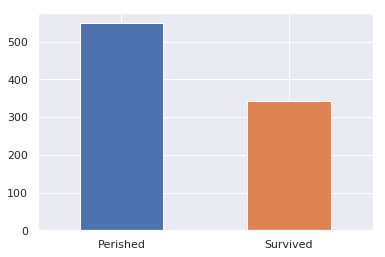

In [4]:
X['Survived'].value_counts().plot(kind='bar')

plt.xticks([0,1], ['Perished', 'Survived'],  rotation='horizontal')

print('There are {} passengers in the data, {} survived and {} perished'.format(X['Survived'].count(), X['Survived'].value_counts()[0], X['Survived'].value_counts()[1]))

There are 3 classes of passenger: 1st, 2nd and 3rd.
There are 216 in 1st class, 184 in 2nd class and 491 in 3rd class


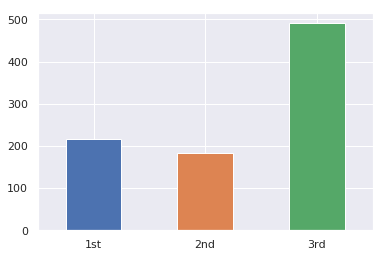

In [5]:
X['Pclass'].value_counts().sort_index().plot(kind='bar')

plt.xticks([0, 1, 2], ['1st', '2nd', '3rd' ],  rotation='horizontal')

print'There are 3 classes of passenger: 1st, 2nd and 3rd.\nThere are {} in 1st class, {} in 2nd class and {} in 3rd class'.format( X['Pclass'].value_counts()[1], X['Pclass'].value_counts()[2], X['Pclass'].value_counts()[3])

There are 577 men and 314 women 


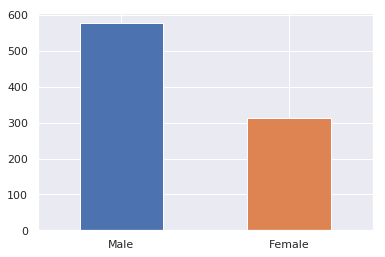

In [6]:
X.loc[:,'Sex'].replace({'male':1, 'female':0},inplace=True)

X['Sex'].value_counts().plot(kind='bar')

plt.xticks([0, 1], ['Male', 'Female'],  rotation='horizontal')

print'There are {} men and {} women '.format( X['Sex'].value_counts()[1], X['Sex'].value_counts()[0])

The ages range between 0.42 and 80.0 years old.
The mean, median and mode are 29.6991176471, 28.0 and 24.0, the data shows a positive skew.
Of 891 values there are 177 null values


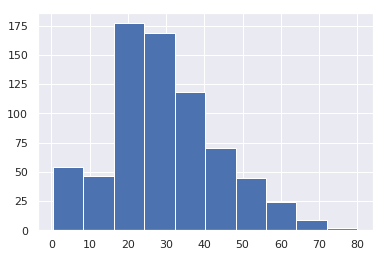

In [7]:
X['Age'].hist()

Ages = X['Age'].describe()

print'The ages range between {} and {} years old.\nThe mean, median and mode are {}, {} and {}, the data shows a positive skew.\nOf {} values there are {} null values'.format(
    Ages['min'], Ages['max'], Ages['mean'], X['Age'].median(), X['Age'].mode()[0], 891, X['Age'].isnull().sum()
)

In [8]:
X['Family'] = X['SibSp'] + X['Parch']

Family: The number of family members brought aboard is between 0 and 10, the mean is 0.904601571268

Sibsp: The  number of siblings and spouses brought aboard is between 0 and 8, the mean is 0.523007856341

Parch: The range of parents and children brought aboard is between 0 and 6, the mean is 0.381593714927



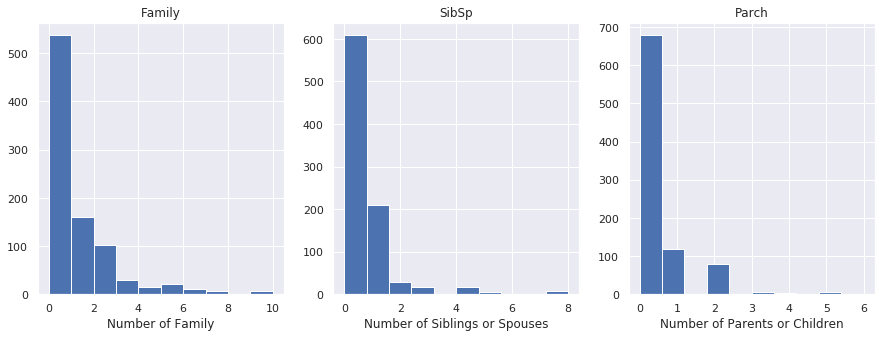

In [9]:
fig, axarr = plt.subplots(1, 3, figsize = (15, 5))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
plots = ['Family', 'SibSp', 'Parch']
desc = ['Family', 'Siblings or Spouses', 'Parents or Children']
for i in range(3):
    plt.sca(axarr[i])
    plt.hist(X[plots[i]])
    plt.title(plots[i])
    plt.xlabel('Number of {}'.format(desc[i]))
 
print 'Family: The number of family members brought aboard is between 0 and {}, the mean is {}\n'.format(X['Family'].max(), X['Family'].mean())
print 'Sibsp: The  number of siblings and spouses brought aboard is between 0 and {}, the mean is {}\n'.format(X['SibSp'].max(), X['SibSp'].mean())
print 'Parch: The range of parents and children brought aboard is between 0 and {}, the mean is {}\n'.format(X['Parch'].max(), X['Parch'].mean())

In [10]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(X.loc[X['Ticket'].str.contains('[a-zA-Z]'), 'Ticket'].value_counts().sort_index(ascending=True))

A./5. 2152            1
A./5. 3235            1
A.5. 11206            1
A.5. 18509            1
A/4 45380             1
A/4 48871             2
A/4. 20589            1
A/4. 34244            1
A/4. 39886            1
A/5 21171             1
A/5 21172             1
A/5 21173             1
A/5 21174             1
A/5 2466              1
A/5 2817              1
A/5 3536              1
A/5 3540              1
A/5 3594              1
A/5 3902              1
A/5. 10482            1
A/5. 13032            1
A/5. 2151             1
A/5. 3336             2
A/5. 3337             1
A/5. 851              1
A/S 2816              1
A4. 54510             1
C 17369               1
C 4001                1
C 7075                1
C 7076                1
C 7077                1
C.A. 17248            1
C.A. 18723            1
C.A. 2315             2
C.A. 24579            1
C.A. 24580            1
C.A. 2673             2
C.A. 29178            1
C.A. 29395            1
C.A. 29566            1
C.A. 31026      

In [11]:
X['Ticket'] = X['Ticket'].str.split()

X['TicketNum'] = X['Ticket'].apply(lambda x: x[-1])

X.loc[X['TicketNum'] == 'LINE', 'TicketNum'] = 0 #Some entries have no ticket number or fare, because they're crew members

X['TicketNum'] = X.loc[:,'TicketNum'].astype(float)

In [12]:
def ticket_clean(x):
    if len(x) == 1:
        x = 'NoPrefix'
        return x
    elif len(x) == 2: 
        return x[0]
    else:
        return ''.join(x[:2])
    
X['Ticket'] = X['Ticket'].apply(ticket_clean)

In [13]:
X['Ticket']

0             A/5
1              PC
2        STON/O2.
3        NoPrefix
4        NoPrefix
5        NoPrefix
6        NoPrefix
7        NoPrefix
8        NoPrefix
9        NoPrefix
10             PP
11       NoPrefix
12           A/5.
13       NoPrefix
14       NoPrefix
15       NoPrefix
16       NoPrefix
17       NoPrefix
18       NoPrefix
19       NoPrefix
20       NoPrefix
21       NoPrefix
22       NoPrefix
23       NoPrefix
24       NoPrefix
25       NoPrefix
26       NoPrefix
27       NoPrefix
28       NoPrefix
29       NoPrefix
          ...    
861      NoPrefix
862      NoPrefix
863           CA.
864      NoPrefix
865      NoPrefix
866      SC/PARIS
867            PC
868      NoPrefix
869      NoPrefix
870      NoPrefix
871      NoPrefix
872      NoPrefix
873      NoPrefix
874          P/PP
875      NoPrefix
876      NoPrefix
877      NoPrefix
878      NoPrefix
879      NoPrefix
880      NoPrefix
881      NoPrefix
882      NoPrefix
883    C.A./SOTON
884      SOTON/OQ
885      N

In [14]:
X['Ticket'] = X['Ticket'].apply(lambda x: x.split('/')).apply(lambda x: ''.join(x))

X.loc[X['Ticket'].str.contains('[a-zA-Z]'), 'Ticket'].value_counts()

NoPrefix     665
PC            60
C.A.          27
STONO2.       18
A5            10
W.C.           9
SOTONO.Q.      8
CA.            8
SOTONOQ        7
A5.            7
CA             6
F.C.C.         5
C              5
SCPARIS        5
S.O.C.         5
SCParis        4
A.5.           4
A4.            4
S.O.P.P.       3
A4             3
PP             3
SCAH           2
S.C.PARIS      2
PPP            2
WEP            2
SOTONO2        2
Fa             1
WC             1
SC             1
SCOW           1
S.C.A.4.       1
S.P.           1
F.C.           1
SWPP           1
C.A.SOTON      1
S.W.PP         1
SCAHBasle      1
W.E.P.         1
SOC            1
AS             1
S.O.P.         1
Name: Ticket, dtype: int64

In [15]:
X['Ticket'] = X['Ticket'].apply(lambda x: x.split('.')).apply(lambda x: ''.join(x)).sort_values()
   
X.loc[X['Ticket'].str.contains('[a-zA-Z]'), 'Ticket'].value_counts()

NoPrefix     665
PC            60
CA            41
A5            21
STONO2        18
SOTONOQ       15
WC            10
SCPARIS        7
A4             7
SOC            6
C              5
FCC            5
SCParis        4
WEP            3
PP             3
SOPP           3
SWPP           2
SOTONO2        2
SCAH           2
PPP            2
SCOW           1
AS             1
SCAHBasle      1
Fa             1
SP             1
SOP            1
CASOTON        1
FC             1
SC             1
SCA4           1
Name: Ticket, dtype: int64

In [16]:
start = ['SC', 'SOTON', 'CA', 'PP', 'SO']

for i in start:
    X.loc[X['Ticket'].str.startswith(i), 'Ticket'] = i

for i in start:
    X.loc[X['Ticket'].str.endswith('PP'), 'Ticket'] = 'PP'

A = ['A4', 'A5']
for item in A:
    X.loc[X['Ticket'] == item, 'Ticket'] = 'A'
    
others = ['FC', 'SP', 'Fa', 'AS', 'WEP', 'FCC', 'C']
for item in others:
    X.loc[X['Ticket'] == item, 'Ticket'] = 'other'

In [17]:
X['Ticket'].value_counts()

NoPrefix    665
PC           60
CA           42
A            28
SO           27
STONO2       18
SC           17
other        17
WC           10
PP            7
Name: Ticket, dtype: int64

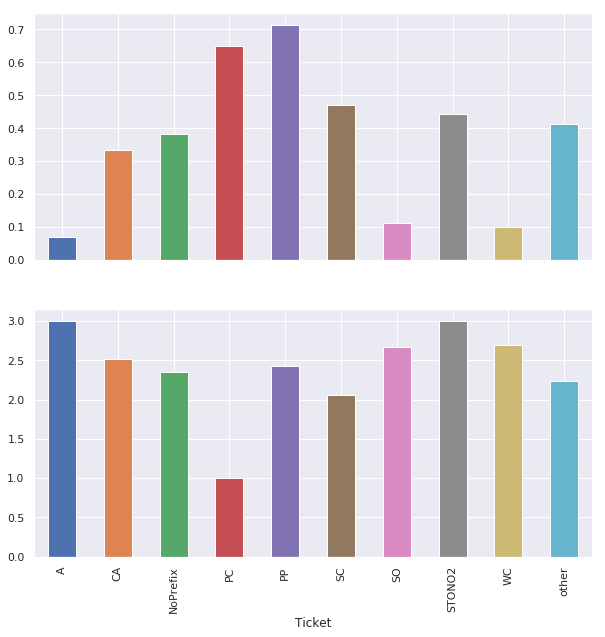

In [18]:
fig, axarr = plt.subplots(2,1, figsize = (10,10))
plots = ['Survived', 'Pclass']
for i in range(2):
    plt.sca(axarr[i])
    X.groupby('Ticket')[plots[i]].mean().plot(kind='bar',sharex=True)
    X.groupby('Ticket')[plots[i]].mean().plot(kind='bar')


In [19]:
def convert_names(df):
    if 'Name' in df:
        split_names = df['Name'].str.split(',')
        titles = split_names.apply(lambda x: x[1]).str.strip().str.split('.').apply(lambda x: x[0])
        df['Title'] = titles
        mens_titles = ['Jonkheer', 'Sir', 'Capt', 'Col', 'Don', 'Dr', 'Rev', 'Major', 'Master']
        mrs_titles = ['Mme']
        miss_titles = ['Ms', 'Lady', 'Mlle', 'the Countess']
        
        for title in mens_titles:
            df.loc[df['Title'] == title, 'Title'] = 'Mr'
        
        for title in miss_titles :
            df.loc[df['Title'] == title, 'Title'] = 'Miss'
            
        for title in mrs_titles:
            df.loc[df['Title'] == title, 'Title'] = 'Mrs'
            
    df = df.drop(['Name'], axis = 1)
    return df

def encode_titles(df):
    encoded_titles = pd.get_dummies(df['Title'])
    df = pd.concat([df, encoded_titles], axis=1)
    df = df.drop(['Title'], axis = 1)
    return df

Text(0,0.5,'Percent Surived')

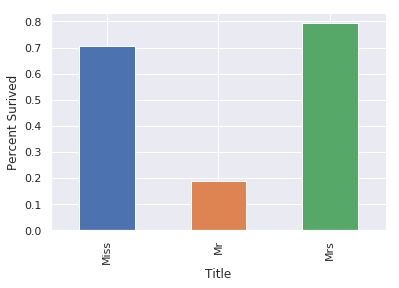

In [20]:
X = convert_names(X)

X.groupby('Title')['Survived'].mean().plot(kind='bar')

plt.ylabel('Percent Surived')

In [21]:
X = encode_titles(X)

In [22]:
X.corr()['Age'].sort_values()

Pclass      -0.369226
SibSp       -0.308247
Family      -0.301914
Miss        -0.271367
Parch       -0.189119
TicketNum   -0.107355
Survived    -0.077221
Sex          0.093254
Fare         0.096067
Mr           0.097200
Mrs          0.178069
Age          1.000000
Name: Age, dtype: float64

Passenger class and title correlates relatively strongly with age so we'll develop a way to use both

In [23]:
dfs = [pd.DataFrame(X.groupby(['Pclass', Title])['Age'].median()) for Title in ['Mr','Mrs', 'Miss']]

display_side_by_side(dfs[0], dfs[1], dfs[2])

Age 
 
 
 Pclass 
 Mr 
 
 
 
 
 
 1 
 0 
 35.0 
 
 
 1 
 41.0 
 
 
 2 
 0 
 28.0 
 
 
 1 
 30.0 
 
 
 3 
 0 
 21.5 
 
 
 1 
 25.0 
 
 
 
 
 
 
 
 Age 
 
 
 Pclass 
 Mrs 
 
 
 
 
 
 1 
 0 
 36.0 
 
 
 1 
 40.0 
 
 
 2 
 0 
 28.0 
 
 
 1 
 32.0 
 
 
 3 
 0 
 23.0 
 
 
 1 
 31.0 
 
 
 
 
 
 
 
 Age 
 
 
 Pclass 
 Miss 
 
 
 
 
 
 1 
 0 
 40.0 
 
 
 1 
 30.0 
 
 
 2 
 0 
 30.0 
 
 
 1 
 24.0 
 
 
 3 
 0 
 26.0 
 
 
 1 
 18.0

Ages vary greatly between the passenger classes and titles, so we'll impute the age based on passenger class and Title

In [24]:
for Title in ['Mr','Mrs', 'Miss']:
    for i in range(1,4):
        X.loc[X['Age'].isnull() & (X[Title] == 1) & (X['Pclass'] == i), 'Age'] = X.groupby(['Pclass', Title])['Age'].median()[i][1]

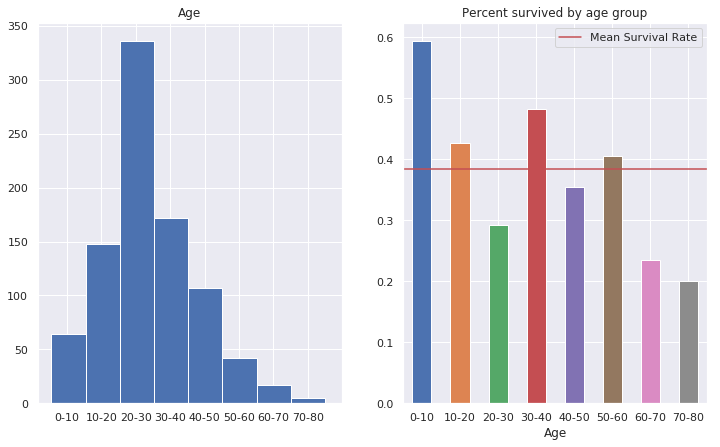

In [25]:
fig, axarr = plt.subplots(1,2, figsize =(12,7))
for i in range(0,2):
    plt.sca(axarr[i])
    if i == 0:
        X['Age'].hist(bins=8, label='Mean Survival Rate in age range')
        plt.title('Age')
        plt.xticks(np.arange(5,95,10), ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80'], rotation='horizontal')
    else:
        try: #Strange error when trying to plot whilst using a categorical index used by pd.cut
            plt.plot(X.groupby(by = pd.cut(X['Age'], 8))['Survived'].mean().plot(kind = 'bar'))
        except: TypeError
        line = plt.axhline(y=X['Survived'].mean(), color = 'r', label='Mean Survival Rate')
        plt.title('Percent survived by age group')
        plt.xticks(np.arange(0,8,1), ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80'], rotation='horizontal')
        plt.legend([line], ['Mean Survival Rate'])
        
    #ax.set(xlim=(0, 10), ylim=(-2, 2),
       #xlabel='x', ylabel='sin(x)',
       #title='A Simple Plot');

There appears to be a higher than average survival rate among infants and a lower surivival rate among older travellers, we'll add features to flag this

In [26]:
def flag_age(df):
    df['Infant'] = df['Age'] <= 7 
    df['Old'] = df['Age'] >= 60
    return df

X = flag_age(X)

In [27]:
X['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [28]:
X[X['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family,TicketNum,Miss,Mr,Mrs,Infant,Old
61,1,1,0,38.0,0,0,NoPrefix,80.0,NaN,0,113572.0,1,0,0,False,False
829,1,1,0,62.0,0,0,NoPrefix,80.0,NaN,0,113572.0,0,0,1,False,True


In [29]:
#S is the mode so we'll impute using that 
X.loc[X['Embarked'].isnull(),'Embarked'] = 'S'

In [30]:
encoded_embarked = pd.get_dummies(X['Embarked'])

X = pd.concat([X, encoded_embarked], axis=1)

X.drop('Embarked', axis = 1, inplace = True)

In [31]:
tick_dummies = pd.get_dummies(X['Ticket'])

X = pd.concat([X.drop('Ticket',axis=1), tick_dummies], axis=1)

# Add in some feature engineering and Selection

Basic Logistic regression for now

In [32]:
def build_model():
    model = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
    ])

    gs = GridSearchCV(
        model,
        {'logreg__penalty': ['l1', 'l2'],
        'logreg__C': np.arange(0.3, 1.2, 0.3)},
        cv=5,
        n_jobs=4
    )
    return model, gs

In [33]:
Y = X.pop('Survived')
X_train, X_test, y_train, y_test = train_test_split(*shuffle(X, Y), test_size=0.3)

In [34]:
model, gs = build_model()
gs.fit(X_train, y_train)
gs.best_params_

{'logreg__C': 0.6, 'logreg__penalty': 'l2'}

In [35]:
prediction = gs.predict(X_test)

print 'Accuracy: %f' % metrics.accuracy_score(prediction, y_test)

Accuracy: 0.835821
